In [41]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.tree import plot_tree, export_text

#tree regression
from sklearn.ensemble import RandomForestRegressor

# imbalanced-learn library
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [42]:
df = pd.read_csv('../texas_dataset/texas_level_encoded_numeric_value_dec_3.csv')
df.head()

,intake_type,intake_condition,sex_intake,breed,CoatColor,CoatPattern,age_intake_months,stay_length,intake_type_encoded,intake_condition_encoded,sex_intake_encoded,breed_encoded,CoatColor_encoded,CoatPattern_encoded
0,Stray,Normal,Female,Domestic_Shorthair_Mix,Black,Solid,1,31,2,3,0,1,0,1
1,Stray,Normal,Male,Other,Brown,Other,36,3,2,3,1,2,3,0
2,Stray,Normal,Male,Other,Brown,Tabby,1,68,2,3,1,2,3,2
3,Owner_Surrender,Normal,Female,Domestic_Shorthair_Mix,White_Mix,Solid,1,24,1,3,0,1,9,1
4,Stray,Normal,Male,Domestic_Shorthair_Mix,Black,Solid,1,30,2,3,1,1,0,1


In [43]:
df.duplicated().sum()

8994

In [44]:
df= df.drop_duplicates(keep='first')
print(df.duplicated().sum())

0


## We are predicting if a cat will stay more than a month in the shelter (yes = 1, no =0) ☟

In [45]:
(df['stay_length']>24).sum()

8576

In [46]:
(df['stay_length']<=24).sum()

8509

In [47]:
# this part is to predict long or short stay (0,1)
import pandas as pd

def categorize_stay(days_stayed):
    if days_stayed <= 24:
        return 0
    else:
        return 1

# Example usage:
# Assuming df is your DataFrame and "days_stayed" is the column you want to categorize
df['stay'] = df['stay_length'].apply(categorize_stay)
df.tail()

,intake_type,intake_condition,sex_intake,breed,CoatColor,CoatPattern,age_intake_months,stay_length,intake_type_encoded,intake_condition_encoded,sex_intake_encoded,breed_encoded,CoatColor_encoded,CoatPattern_encoded,stay
26072,Owner_Surrender,Normal,Male,Domestic_Shorthair,Black_N_White,Solid,1,38,1,3,1,0,1,1,1
26073,Owner_Surrender,Normal,Male,Domestic_Shorthair,Blue,Tabby,4,7,1,3,1,0,2,2,0
26075,Stray,Normal,Male,Domestic_Shorthair,White_Mix,Solid,11,16,2,3,1,0,9,1,0
26076,Stray,Neonatal,Male,Domestic_Shorthair,Brown,Tabby,0,75,2,2,1,0,3,2,1
26077,Owner_Surrender,Normal,Female,Domestic_Shorthair,Calico_or_Calico_mix,Solid,36,7,1,3,0,0,4,1,0


In [48]:
df.head()

,intake_type,intake_condition,sex_intake,breed,CoatColor,CoatPattern,age_intake_months,stay_length,intake_type_encoded,intake_condition_encoded,sex_intake_encoded,breed_encoded,CoatColor_encoded,CoatPattern_encoded,stay
0,Stray,Normal,Female,Domestic_Shorthair_Mix,Black,Solid,1,31,2,3,0,1,0,1,1
1,Stray,Normal,Male,Other,Brown,Other,36,3,2,3,1,2,3,0,0
2,Stray,Normal,Male,Other,Brown,Tabby,1,68,2,3,1,2,3,2,1
3,Owner_Surrender,Normal,Female,Domestic_Shorthair_Mix,White_Mix,Solid,1,24,1,3,0,1,9,1,0
4,Stray,Normal,Male,Domestic_Shorthair_Mix,Black,Solid,1,30,2,3,1,1,0,1,1


In [49]:
count_ones = df['stay'].value_counts().get(1)
print(f"Number of occurrences of 1: {count_ones}")

count_zeros = df['stay'].value_counts().get(0)
print(f"Number of occurrences of 0: {count_zeros}")


Number of occurrences of 1: 8576
Number of occurrences of 0: 8509


In [10]:
# independent_variables = ['simplified_color_encoded', 'simplified_sex_encoded',  
#                      'simplified_condition_encoded', 'simplified_type_encoded', 'intake_age']

# dependent_variable = 'stay'

In [50]:
independent_variables = ['age_intake_months', 
                     'intake_type_encoded', 'intake_condition_encoded',
                     'CoatColor_encoded', 'sex_intake_encoded', 'CoatPattern_encoded',
                      'breed_encoded']

dependent_variable = 'stay'

In [51]:
df[independent_variables]

,age_intake_months,intake_type_encoded,intake_condition_encoded,CoatColor_encoded,sex_intake_encoded,CoatPattern_encoded,breed_encoded
0,1,2,3,0,0,1,1
1,36,2,3,3,1,0,2
2,1,2,3,3,1,2,2
3,1,1,3,9,0,1,1
4,1,2,3,0,1,1,1
...,...,...,...,...,...,...,...
26072,1,1,3,1,1,1,0
26073,4,1,3,2,1,2,0
26075,11,2,3,9,1,1,0
26076,0,2,2,3,1,2,0


In [52]:
X= df[independent_variables]
y= df[dependent_variable]
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train.shape, X_test.shape

# # Use imbalanced-learn to resample the training data
# ros = RandomUnderSampler(sampling_strategy='auto', random_state=42)  # we can adjust the sampling_strategy as needed
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


((13668, 7), (3417, 7))

In [53]:
(y_test==1).sum()

1760

In [54]:
(y_test==0).sum()

1657

In [55]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}
grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='accuracy',
    cv=5, 
    verbose=1
)

# 1. Fit your GridSearchCV with your training data. 
# grid_search_cv.fit(X_resampled, y_resampled)

grid_search_cv.fit(X_train, y_train)

# Print the best parameters it found
print(grid_search_cv.best_estimator_) 

good_model = grid_search_cv.best_estimator_


# ----------------------- Now lets evaluate our model------------
y_pred = good_model.predict(X_test)


accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred= y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred= y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred= y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = good_model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
RandomForestClassifier(max_depth=10, max_leaf_nodes=10)
Accuracy Score: 0.694469
Precision Score: 0.747238
Recall Score: 0.614773
F1 Score: 0.674564
AUC Score: 0.757235


In [56]:
feature_importance = pd.Series(good_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

age_intake_months           0.641191
intake_type_encoded         0.194632
intake_condition_encoded    0.132636
CoatColor_encoded           0.014417
breed_encoded               0.013733
CoatPattern_encoded         0.002542
sex_intake_encoded          0.000849
dtype: float64


In [57]:
ratio = (y_test == 1).sum() / ((y_test == 0) | (y_test == 1)).sum()
ratio

0.5150717003219198

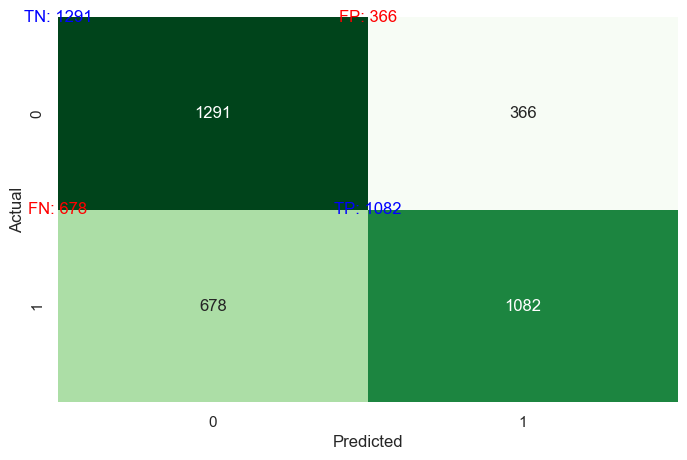

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

# Extract individual elements from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False, ax=ax)

# Label the heatmap with TN, FP, FN, and TP values
ax.text(0, 0, f'TN: {tn}', ha='center', va='center', color='blue', fontsize=12)
ax.text(1, 0, f'FP: {fp}', ha='center', va='center', color='red', fontsize=12)
ax.text(0, 1, f'FN: {fn}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 1, f'TP: {tp}', ha='center', va='center', color='blue', fontsize=12)

# Set labels for x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()


0 means staying **less than one month** & 1 means **staying more than one month**
### which means
#### row 1 -> predicts the cat who will stay less
#### and row 2 -> predicts the cat who will stay more

# ⬆︎⬆︎----------- Accuracy Score: 0.691713,  F1 Score: 0.662394, AUC Score: 0.759893 -------- ⬆︎⬆︎

## in order to solve the imbalance in calss we use the below code ☟

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Load your dataset
df2 = pd.read_csv('../texas_dataset/texas_level_encoded_numeric_value_dec_3.csv')
# df= df.drop_duplicates(keep='first')

# Define the function to categorize stay
def categorize_stay(days_stayed):
    if days_stayed <= 24:
        return 0
    else:
        return 1

# Apply the categorization
df2['stay'] = df2['stay_length'].apply(categorize_stay)

independent_variables = ['age_intake_months', 
                     'intake_type_encoded', 'intake_condition_encoded',
                     'CoatColor_encoded', 'sex_intake_encoded', 'CoatPattern_encoded',
                      'breed_encoded']

dependent_variable = 'stay'

X = df2[independent_variables]
y = df2['stay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

# Use imbalanced-learn to resample the training data
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)  # You can adjust the sampling_strategy as needed
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# # Alternatively, you can use RandomUnderSampler for undersampling
# rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Define the hyperparameter grid for GridSearchCV
params = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}

# Use GridSearchCV with RandomForestClassifier
grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='accuracy',
    cv=5, 
    verbose=1
)

# Fit the model on the resampled data
grid_search_cv.fit(X_resampled, y_resampled)

# Print the best parameters it found
print(grid_search_cv.best_estimator_) 

# Extract the best model from GridSearchCV
use_model = grid_search_cv.best_estimator_

# Evaluate the model on the original test set
y_pred = use_model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = use_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

from joblib import dump
dump(use_model, '../texas_strealit_app/use_model.joblib')


Fitting 5 folds for each of 162 candidates, totalling 810 fits
RandomForestClassifier(max_depth=10, max_features='log2', max_leaf_nodes=10)
Accuracy Score: 0.728988
Precision Score: 0.725073
Recall Score: 0.710626
F1 Score: 0.717777
AUC Score: 0.795007


['../texas_strealit_app/use_model.joblib']

In [36]:
feature_importance = pd.Series(use_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

age_intake_months           0.763327
intake_type_encoded         0.127747
intake_condition_encoded    0.081020
breed_encoded               0.013022
CoatColor_encoded           0.011543
CoatPattern_encoded         0.001895
sex_intake_encoded          0.001447
dtype: float64


In [37]:
ratio = (y_test == 1).sum() / ((y_test == 0) | (y_test == 1)).sum()
ratio

0.4849693251533742

In [38]:
(y_test == 1).sum()

3162

In [39]:
(y_test == 0).sum()

3358

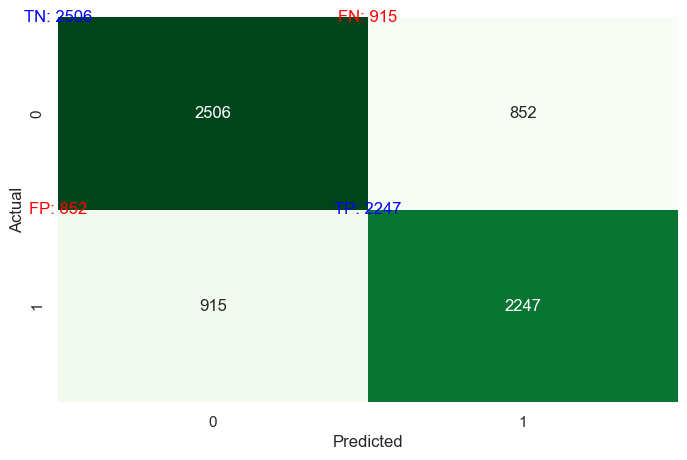

In [40]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

# Extract individual elements from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False, ax=ax)

# Label the heatmap with TN, FP, FN, and TP values
ax.text(0, 0, f'TN: {tn}', ha='center', va='center', color='blue', fontsize=12)
ax.text(0, 1, f'FP: {fp}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 0, f'FN: {fn}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 1, f'TP: {tp}', ha='center', va='center', color='blue', fontsize=12)

# Set labels for x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()


⬆︎⬆︎ 0 means staying **less than one month** & 1 means **staying more than one month**
### which means
#### row 1 -> predicts the cat who will stay less
#### and row 2 -> predicts the cat who will stay more

## ⬆︎⬆︎-------  Accuracy Score: 0.728681 ## Precision Score: 0.724316 ## Recall Score: 0.711259 ## F1 Score: 0.717728 ## AUC Score: 0.788243 ------- ⬆︎⬆︎